# Tree Based Method
## Decision Tree and Random Forest
### Decision Tree Building


Import packages and read data.

In [1]:
# import packages
import numpy as np
%matplotlib inline
import pandas as pd

## load iris data from file
#Location = r'data\IrisData.csv'
#df = pd.read_csv(Location)

# load iris data by scikit-learn function 
from sklearn import datasets
iris = datasets.load_iris()

# Iris Data 설명

Assign feature matrix and target value
- $\mathbf{x}$: input feature (petal length and petal width)
- $y$: output label (0, 1, 2; setosa, vergicolor, verginica)

In [2]:
print(iris.data)
X = iris.data[:, [2,3]]
y = iris.target

print(len(X))

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

## Feature 확인
 - X 처음부터 5개까지만 확인

In [3]:
X[:5, :]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

## Y 확인
 - 0, 1, 2  (0, 1, 2; setosa, vergicolor, verginica)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Sample을 Prediction과 Train으로 나눈다.

Split the dataset into separate training and test datasets.
Randomly split the $\mathbf{x}$ and $y$ arrays into
   1. 30% test data (45 samples) and  
   1. 70% training data (105 samples).

In [5]:
from sklearn.cross_validation import train_test_split

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## X_Train 확인
 - 총 150개중 105개의 X_train 

In [7]:
X_train.shape
#y_train.shape
#X_test.shape

(105, 2)

## Model 생성
### Decision Tree
- Use entropy (deviance) as the impurity measure
- Limit the tree depth to three (to prevent overfitting).

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


#print(help(DecisionTreeClassifier))

## Plotting 알고리즘
 - 복잡하니깐 알필요 없음

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=55, label='test set')

## Fitting Decision Model
 - Fit decision tree using training set.

In [10]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

## Evaluation
- Test the tree and show the plot the results.

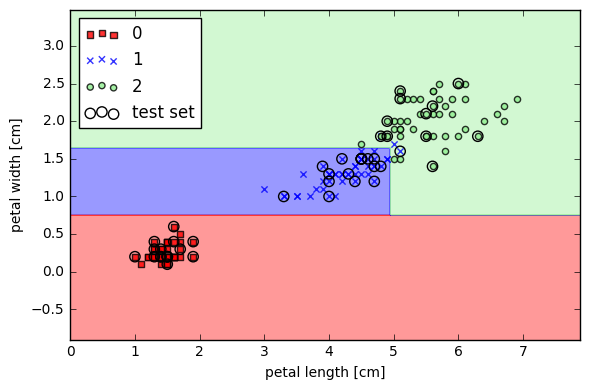

In [11]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

### Decision Tree를 Visualize

From the export facility of `scikit-learn`, we can visualize the decision tree.
- create the .dot file using export_graphvis function.
- then convert tree.dot file input a PNG file.

In [12]:
from sklearn.tree import export_graphviz
from subprocess import check_call
import pydot

export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
#(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.draw('tree.png')
check_call(['dot','-Tpng','tree.dot','-o','tree2.png'])

0

- Using `GraphVis` software, we can convert dot file to png file.
- In this example, decision tree is saved as tree.png, as shown below.

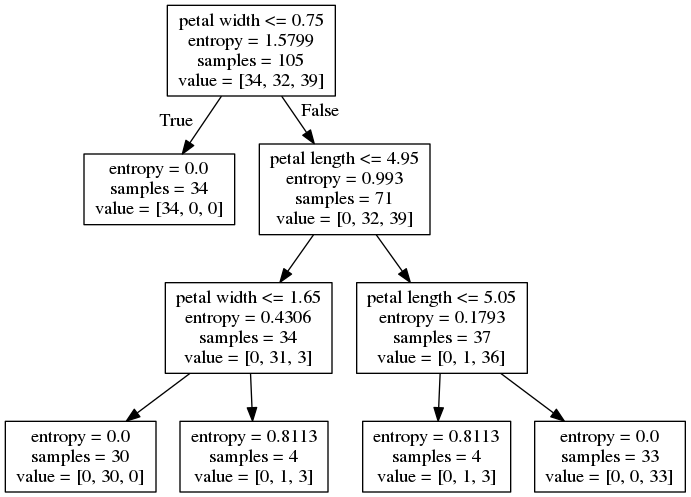

In [13]:
from IPython.display import Image
Image(filename='tree2.png', width=600)

## EXERCISE 1. Parameter tuning for decision tree

예제를 확인했으니, 이를 응용해 봅시다.  
먼저 decision tree의 parameter 중 max_depth를 변화해가며 결과를 확인해 보겠습니다.  
max_depth가 1,3,10,30인 경우의 decision tree를 만들어주세요.  
(되도록 같은 코드를 여러번 작성하지 않고, `for` 등의 반복문을 이용합시다.)

- 두줄 정도면 됨

In [14]:
n = (1,3,10,30)
tree_abb = {_i : DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0) for _i, depth in enumerate(n)}


# max_depth 별 Decision Boundary 변화
 - max_depth가 깊어지면 어떻게 되는가?
 - 코드 세줄이면 됨

NameError: name 'train_tree' is not defined

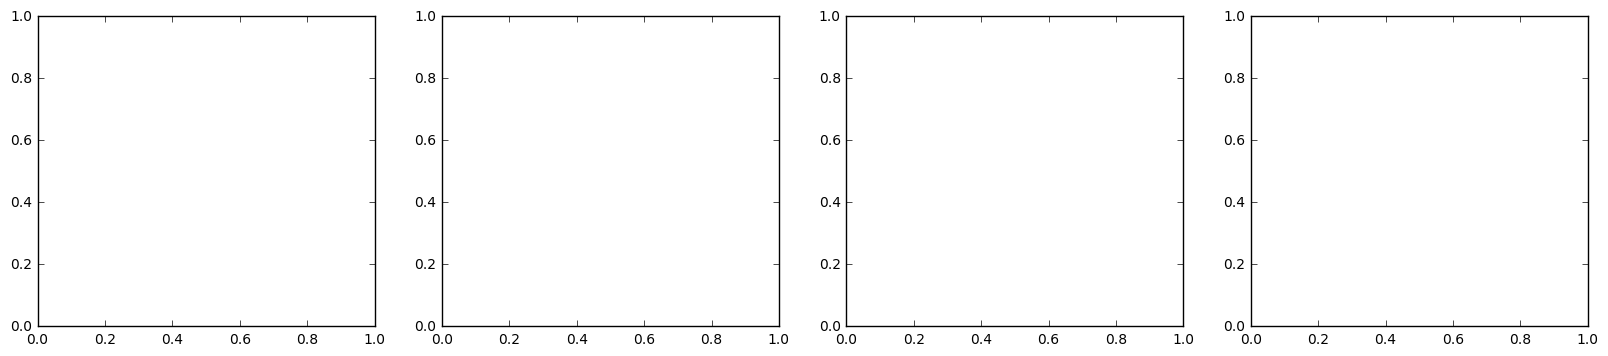

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (20,4))
print(type(train_tree.get(1)))



plt.show()
## TODO: 각각의 tree_abb[i]를 시각화하는 그래프 그리기

각각의 실험 결과를 눈으로 확인했는데요, 이제 주어진 classifier에 대해 다음 세 항목을 수치로 출력해보는 함수를 작성해 봅시다.
1. training accuracy
1. test accuracy
1. 수행 속도



## EXERCISE 2. Extension to Random forest

위 과정을 모두 완료했다면, random forest를 이용해 분류하는 방법을 알아보겠습니다.

### Random Forest
1. Draw a random bootstrap samples of size `n` (with replacement)
2. Grow `d` decision tree from the bootstrap sample. At each node:  
    A. Randomly select `d` features without replacement.  
    B. Split the node using the feature that provides the best split according to objective function.
3. Repeat the step 1 and 2, `k` times.
4. Aggregate the prediction, to assign the class label by majority vote.

Parameters (used in this example):
* `n_estimators`: integer, optional (default = 10)  
    The number of trees in the forest.
* `criterion`: string, (default = "gini")  
    The impurity measure.
* `random_state`: used to control the random number generator
* `n_jobs`: integer, optional (default = 1)  
    The number of jobs to run in parallel for both fit and predict.  
    If -1, then the number of jobs is set to the number of cores.

## Random forest로 훈련 및 평가
 - 10개의 bagging에 10개의 classfier로 majority로 orverfitting을 줄임

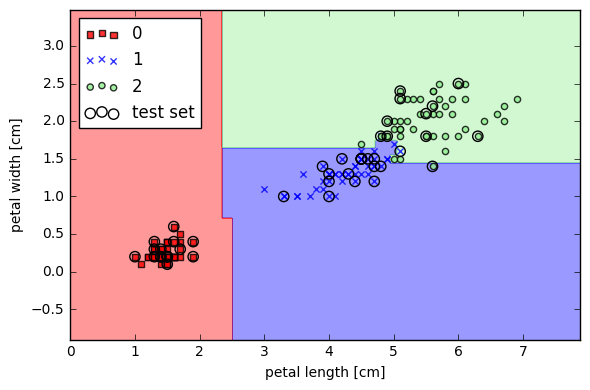

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit (X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

In [447]:
## TODO: digits 데이터를 random forest를 이용해 분류하여 training accuracy, test accuracy, 수행 속도 출력